In [40]:
 !pip install xgboost

     -------------------------------------- 150.0/150.0 MB 3.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [6]:
print(df.shape)
print(df.columns)

(53940, 10)
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df.duplicated().sum()

146

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(53794, 10)

In [13]:
df.drop(df[df['x']==0].index,inplace=True)
df.drop(df[df['y']==0].index,inplace=True)
df.drop(df[df['z']==0].index,inplace=True)

In [14]:
df.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


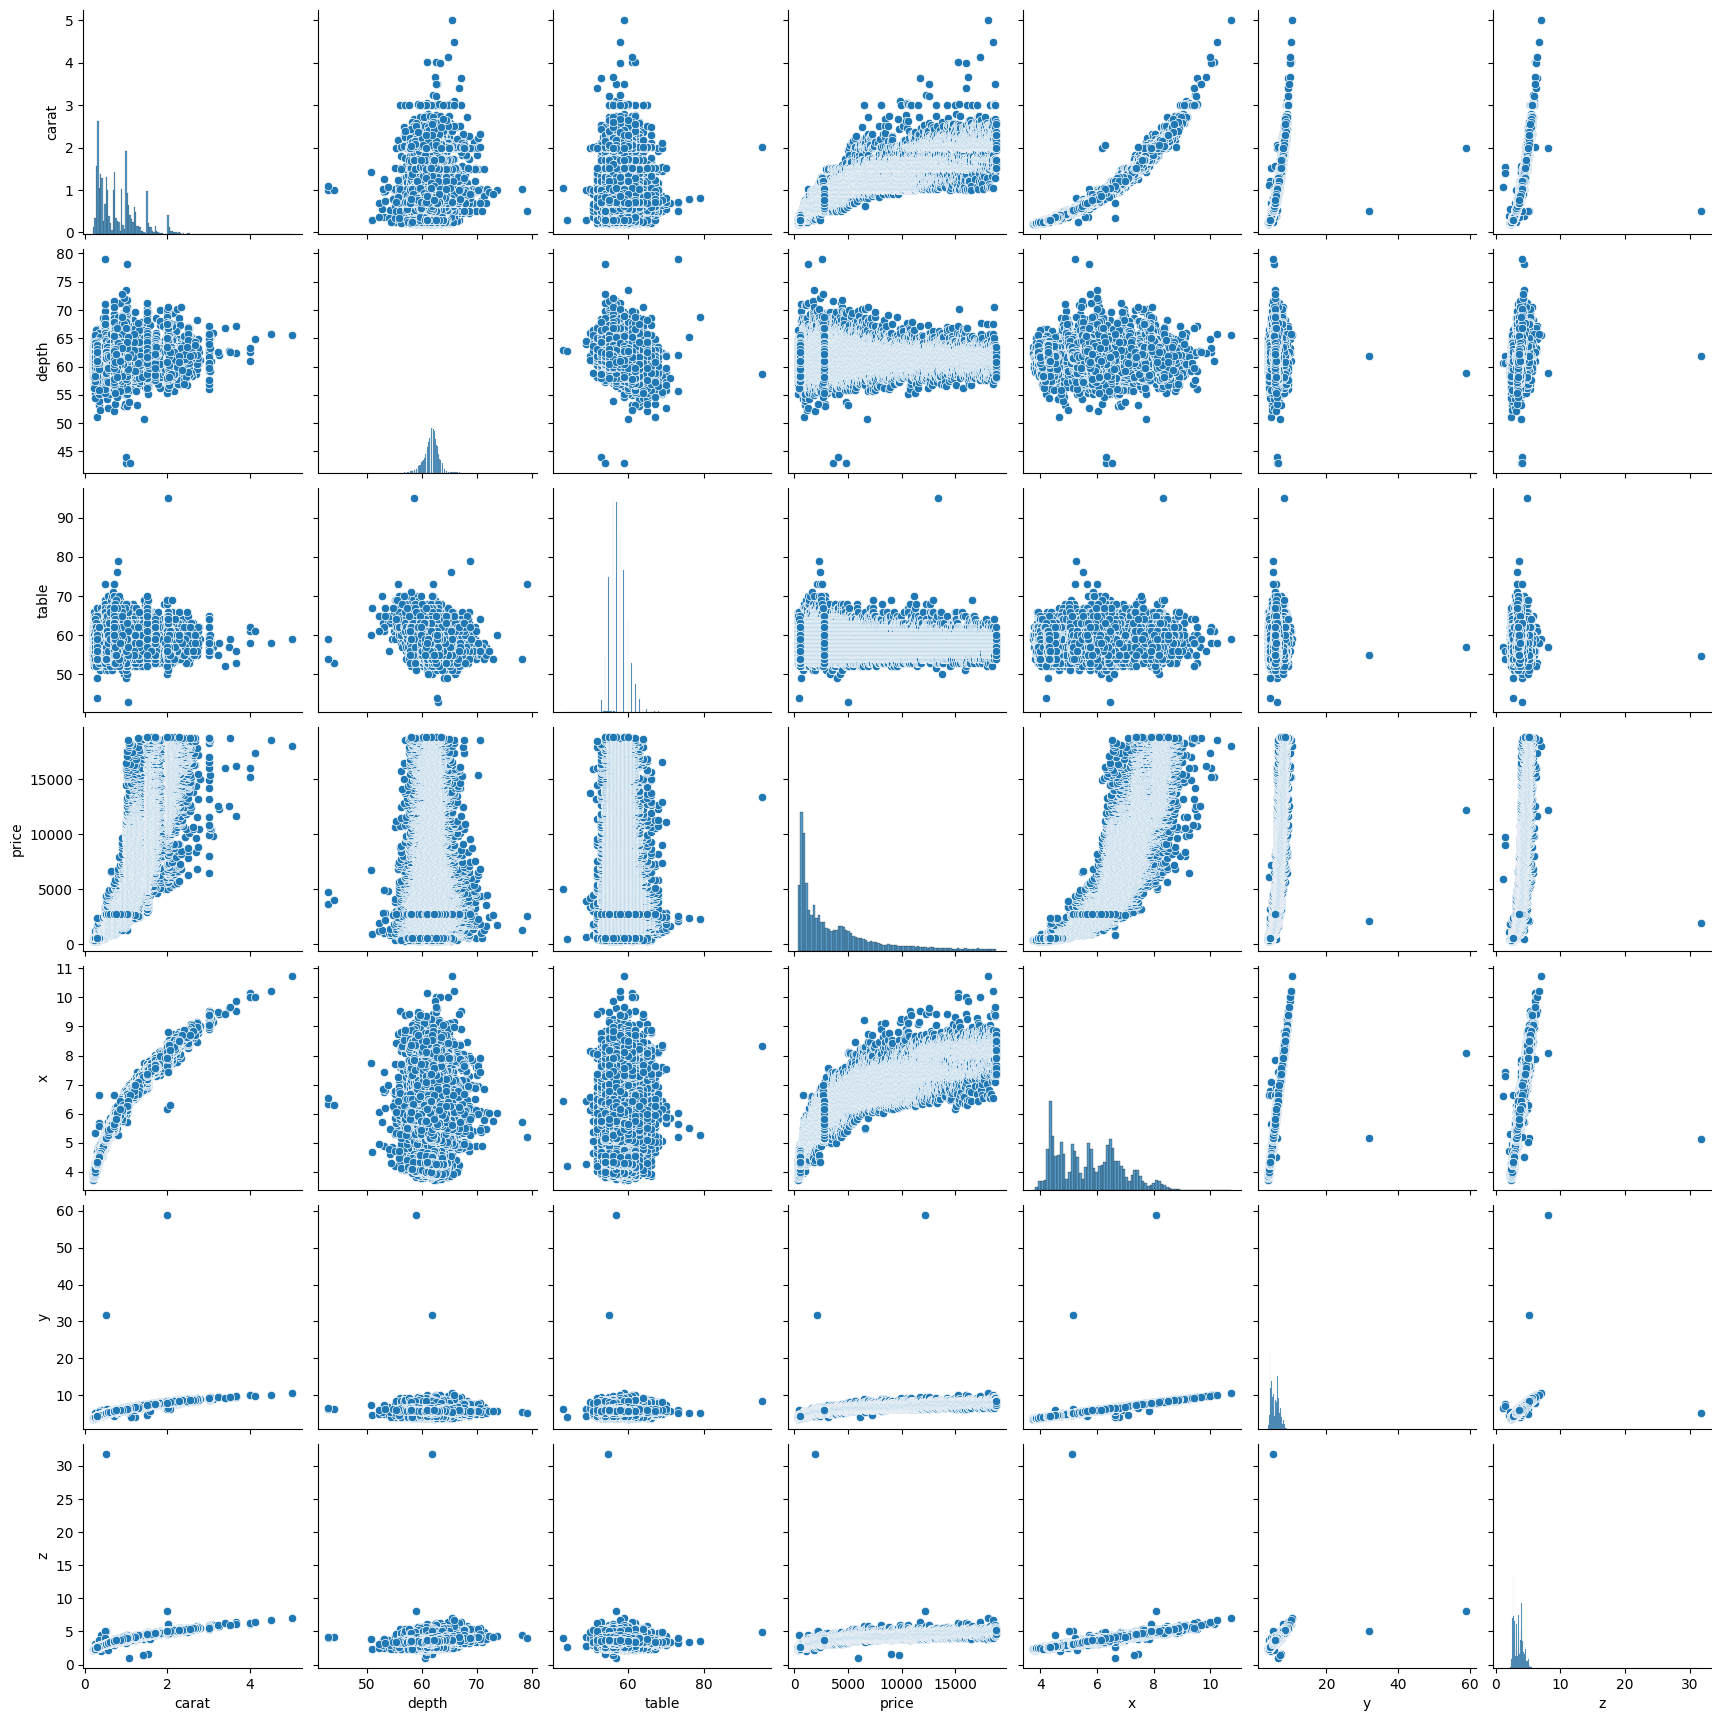

In [15]:
import seaborn as sns
sns.pairplot(df)

In [16]:
df = df[(df['depth']<75) & (df['depth']>50)]
df = df[(df['table']<80) & (df['table']>45)]
df = df[(df['x']<30)]
df = df[(df['y']<30)]
df = df[(df['z']<30) & (df['z']>2)]

In [17]:
df.shape

(53761, 10)

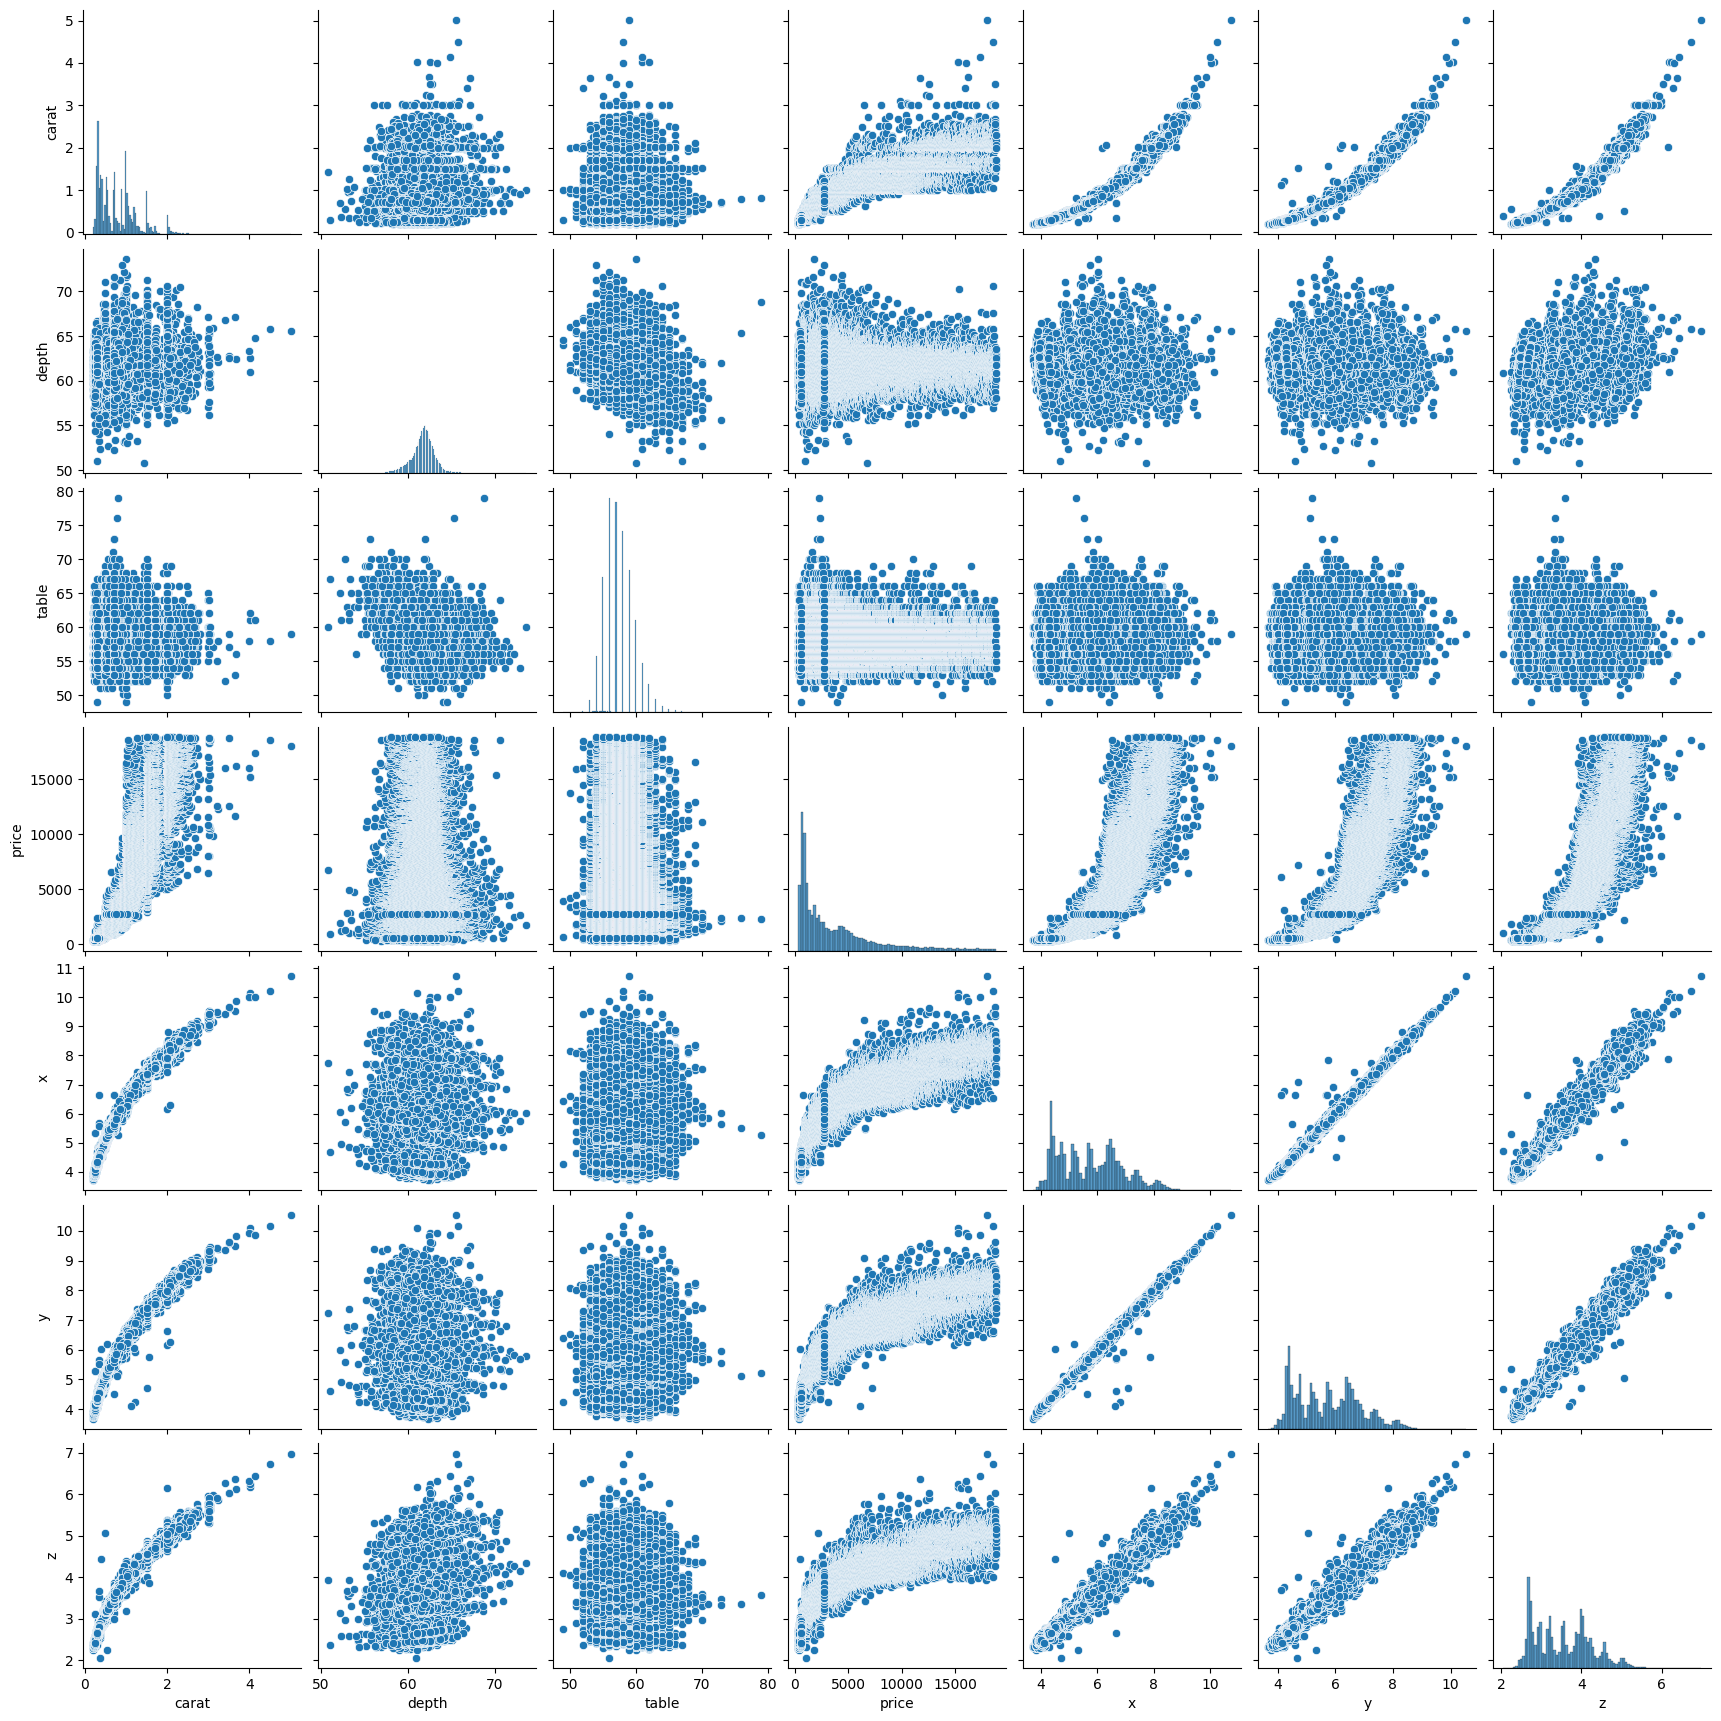

In [18]:
sns.pairplot(df)

In [19]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


C:\Users\pragy\AppData\Local\Temp\ipykernel_8164\1705682667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cut', y='price', data=df,palette='coolwarm')


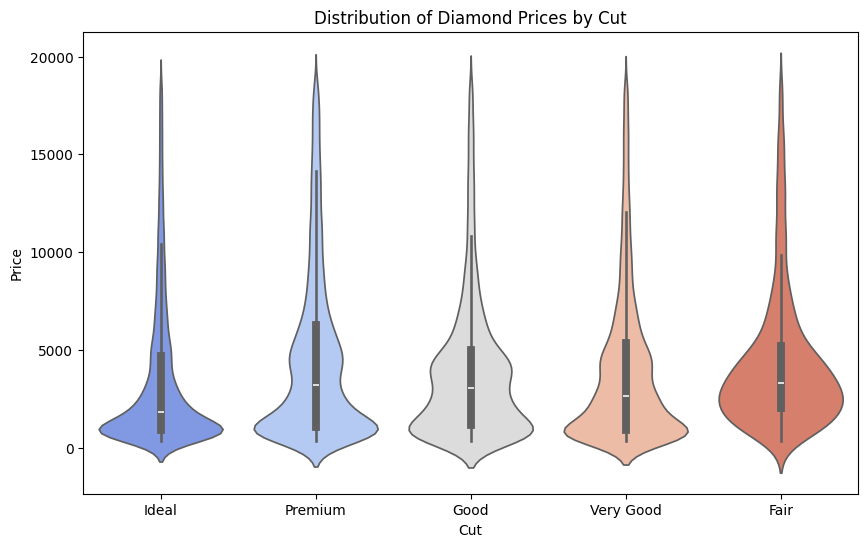

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='cut', y='price', data=df,palette='coolwarm')
plt.title('Distribution of Diamond Prices by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

C:\Users\pragy\AppData\Local\Temp\ipykernel_8164\718089198.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y='price', data=df,palette='coolwarm')


<Axes: xlabel='color', ylabel='price'>

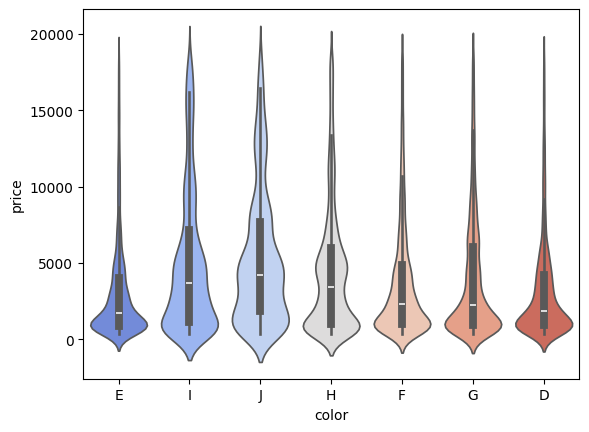

In [24]:
sns.violinplot(x='color', y='price', data=df,palette='coolwarm')


C:\Users\pragy\AppData\Local\Temp\ipykernel_8164\1157735488.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='clarity', y='price', data=df,palette='coolwarm')


<Axes: xlabel='clarity', ylabel='price'>

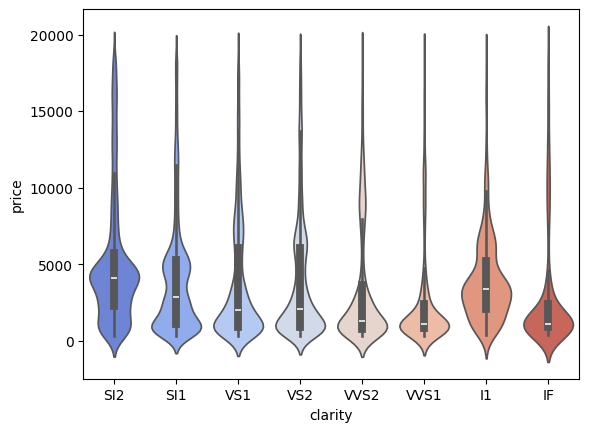

In [25]:
sns.violinplot(x='clarity', y='price', data=df,palette='coolwarm')


In [26]:
labelled_data = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in object_cols:
    labelled_data[col] = lb.fit_transform(labelled_data[col])

labelled_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

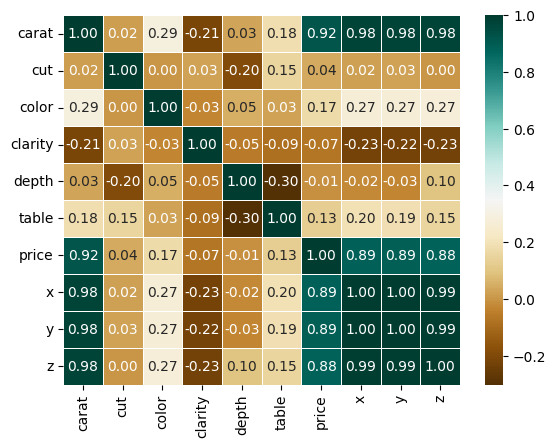

In [29]:
corr = labelled_data.corr()
sns.heatmap(corr,annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)

In [30]:
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [37]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
df_scaled = labelled_data.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])


In [38]:
df_scaled.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.199375,2,1,3,-0.175254,-1.104744,326,-1.592616,-1.578907,-1.605761
1,-1.241647,3,1,2,-1.373023,1.592247,326,-1.646257,-1.704981,-1.779454
2,-1.199375,1,1,4,-3.416274,3.390241,327,-1.503215,-1.497860,-1.779454
3,-1.072561,3,5,5,0.458858,0.243751,334,-1.369112,-1.353775,-1.316271
4,-1.030290,1,6,3,1.092971,0.243751,335,-1.243950,-1.245712,-1.142578


In [39]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('price',axis=1)
y = df_scaled['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}


In [44]:

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

     # Evaluation Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    
    # Adjusted R2
    adj_r2 = 1 - ((1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    
    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, df_scaled, y, cv=5, scoring='r2')
    cv_r2 = np.mean(cv_scores)

    results.append((name, r2, adj_r2, rmse,MAE, cv_r2))



In [46]:
# Create results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "Adjusted R2", "MSE", "MAE","CV R2"])
results_df.sort_values(by="Adjusted R2", ascending=False, inplace=True)

print(results_df)

                      Model  R2 Score  Adjusted R2           MSE          MAE  \
3                   XGBoost  0.980911     0.980895  3.042280e+05   280.295440   
2             Random Forest  0.980254     0.980237  3.146992e+05   275.355386   
5             KNN Regressor  0.963991     0.963961  5.738787e+05   392.965777   
1             Decision Tree  0.963551     0.963521  5.808811e+05   366.032224   
0         Linear Regression  0.885778     0.885682  1.820360e+06   862.807100   
4  Support Vector Regressor  0.566829     0.566467  6.903426e+06  1306.856521   

      CV R2  
3  0.563099  
2  0.652908  
5  0.653179  
1  0.652982  
0  1.000000  
4  0.403602  


In [51]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_split=2,min_samples_leaf=1)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cv_scores = cross_val_score(rf, df_scaled, y, cv=5, scoring='r2')
cv_r2 = np.mean(cv_scores)
print(cv_r2)
# grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
#                        scoring='r2', cv=5, n_jobs=-1, verbose=2)
# grid_rf.fit(X_train, y_train)

# print("Best Params:", grid_rf.best_params_)
# print("Best R2 Score:", grid_rf.best_score_)


0.6528229363003006


In [50]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
print(r2)
print(mse)
print(mae)

0.9782807288276449
346139.3706719507
309.4531556968778


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0]
}

grid_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,
                              scoring='r2', n_iter=10, cv=5, n_jobs=-1, verbose=2)
grid_xgb.fit(X_train, y_train)

print("Best Params:", grid_xgb.best_params_)
print("Best R2 Score:", grid_xgb.best_score_)
